In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
data = pd.read_excel("D:\__Works__\Лабы\Stat.Lab-3sem\Сдать графики\\ans_1.xlsx")
data = data[["Левая","Правая"]]
print(data)
left_val = data[['Левая']].to_numpy()
right_val = data[['Правая']].to_numpy()

    Левая  Правая
0    32.5    32.5
1    32.8    31.9
2    31.2    31.6
3    31.5    32.0
4    30.1    30.3
..    ...     ...
56   33.4    33.7
57   33.7    33.3
58   34.7    34.6
59   33.8    34.5
60   33.8    33.7

[61 rows x 2 columns]


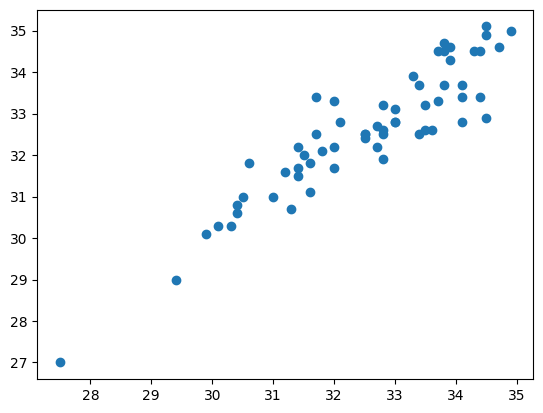

In [21]:
#Вид регрессии: квадратичная

# Преобразование данных в массивы NumPy
left_val = data[['Левая']].to_numpy().reshape(-1)
right_val = data[['Правая']].to_numpy().reshape(-1)

plt.scatter(left_val, right_val)

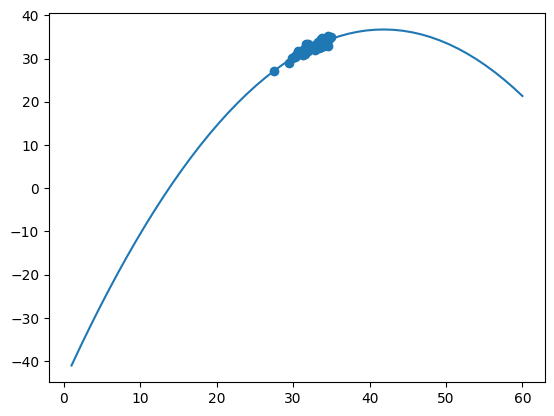

In [22]:
#polynomial fit with degree = 2

model = np.poly1d(np.polyfit(left_val, right_val, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 60, 50)
plt.scatter(left_val, right_val)
plt.plot(polyline, model(polyline))
plt.show() 

In [30]:
from sklearn.metrics import r2_score

# Получите предсказанные значения для ваших данных
predicted_values = model(left_val)

# Вычислите R^2
r2 = r2_score(right_val, predicted_values)

print("R^2 score:", r2)


R^2 score: 0.8487984737908281


In [31]:
r2_lin = 0.840
F_stat_lin = 308.6

In [33]:
from scipy.stats import f

# Количество предикторов в модели (включая свободный член)
k = 3

n = 61

F_stat = (r2 / k) / ((1-r2) / (n - k -1))

p_value = f.cdf(F_stat, k, n - k - 1)

print("F-statistic:", F_stat)
print("p-value for F-statistic:", p_value)

F-statistic: 106.66010725126831
p-value for F-statistic: 0.9999999999999999
